In [51]:
# 질병관리청 코로나19 백신 접종 현황 사이트 점검중이라 어제 csv로 만들어 둔 파일 활용.
# Pandas의 csv 파일 읽기 메서드 활용. 한글이 깨져 나와서 encoding = 'euc-kr' 로 지정.
import pandas as pd
c = pd.read_csv('C:/myPyCode/table.csv', encoding = 'euc-kr')
c.head(3)

,Unnamed: 0,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
0,1,서울특별시강남구보건소,1891.0,285976.0,5094.0,163555.0
1,2,서울특별시강동구보건소,1676.0,258219.0,5505.0,143925.0
2,3,서울특별시강북구보건소,921.0,179060.0,2796.0,103093.0


In [52]:
c.columns

Index(['Unnamed: 0', '구분', '1회차 당일 접종', '1회차 당일 누계', '접종완료 당일 실적',
       '접종완료 당일 누계'],
      dtype='object')

In [53]:
c = c.drop(['Unnamed: 0'], axis = 1)
c.tail(3)

,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
24,서울특별시중랑구보건소,1364.0,226033.00,3655.0,126960.00
25,합계,34235.0,5450266.00,94420.0,3054297.00
26,평균,1369.4,218010.64,3776.8,122171.88


In [54]:
c = c[0:25]
c.tail(4)

,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
21,서울특별시은평구보건소,1361.0,270593.0,3811.0,154314.0
22,서울특별시종로구보건소,685.0,114927.0,1403.0,69333.0
23,서울특별시중구보건소,474.0,84201.0,1450.0,50264.0
24,서울특별시중랑구보건소,1364.0,226033.0,3655.0,126960.0


In [55]:
# 열(column) 명칭 일괄 변경.
c.columns = ['행정구', '1회차_당일', '1회차_누계', '접종완료_당일', '접종완료_누계']
c.tail(3)

,행정구,1회차_당일,1회차_누계,접종완료_당일,접종완료_누계
22,서울특별시종로구보건소,685.0,114927.0,1403.0,69333.0
23,서울특별시중구보건소,474.0,84201.0,1450.0,50264.0
24,서울특별시중랑구보건소,1364.0,226033.0,3655.0,126960.0


In [56]:
# strip 메서드 활용하여 행정구만 표기.
c['행정구'] = c['행정구'].str.strip('서울특별시')
c['행정구'] = c['행정구'].str.strip('보건소')
c.tail(3)

,행정구,1회차_당일,1회차_누계,접종완료_당일,접종완료_누계
22,종로구,685.0,114927.0,1403.0,69333.0
23,중구,474.0,84201.0,1450.0,50264.0
24,중랑구,1364.0,226033.0,3655.0,126960.0


In [57]:
# 필요한 데이터만 추출하기 위해 drop 메서드로 필요 없는 데이터(열, column) 삭제
today_total = c.drop(['1회차_누계','접종완료_누계'],axis = 1)
today_total.tail(3)

,행정구,1회차_당일,접종완료_당일
22,종로구,685.0,1403.0
23,중구,474.0,1450.0
24,중랑구,1364.0,3655.0


In [58]:
# 필요한 데이터만 추출하기 위해 drop 메서드로 필요 없는 데이터(열, column) 삭제
sum_total = c.drop(['1회차_당일','접종완료_당일'],axis = 1)
sum_total.tail(3)

,행정구,1회차_누계,접종완료_누계
22,종로구,114927.0,69333.0
23,중구,84201.0,50264.0
24,중랑구,226033.0,126960.0


In [59]:
# 인덱스를 '행정구' 열로 변경. 인덱스를 변경해야 그래프에 행정구 별로 표기 가능.
today_total = today_total.set_index('행정구')
today_total.tail(3)

,1회차_당일,접종완료_당일
행정구,,
종로구,685.0,1403.0
중구,474.0,1450.0
중랑구,1364.0,3655.0


In [60]:
# 인덱스를 '행정구' 열로 변경. 인덱스를 변경해야 그래프에 행정구 별로 표기 가능.
sum_total = sum_total.set_index('행정구')
sum_total.tail(3)

,1회차_누계,접종완료_누계
행정구,,
종로구,114927.0,69333.0
중구,84201.0,50264.0
중랑구,226033.0,126960.0


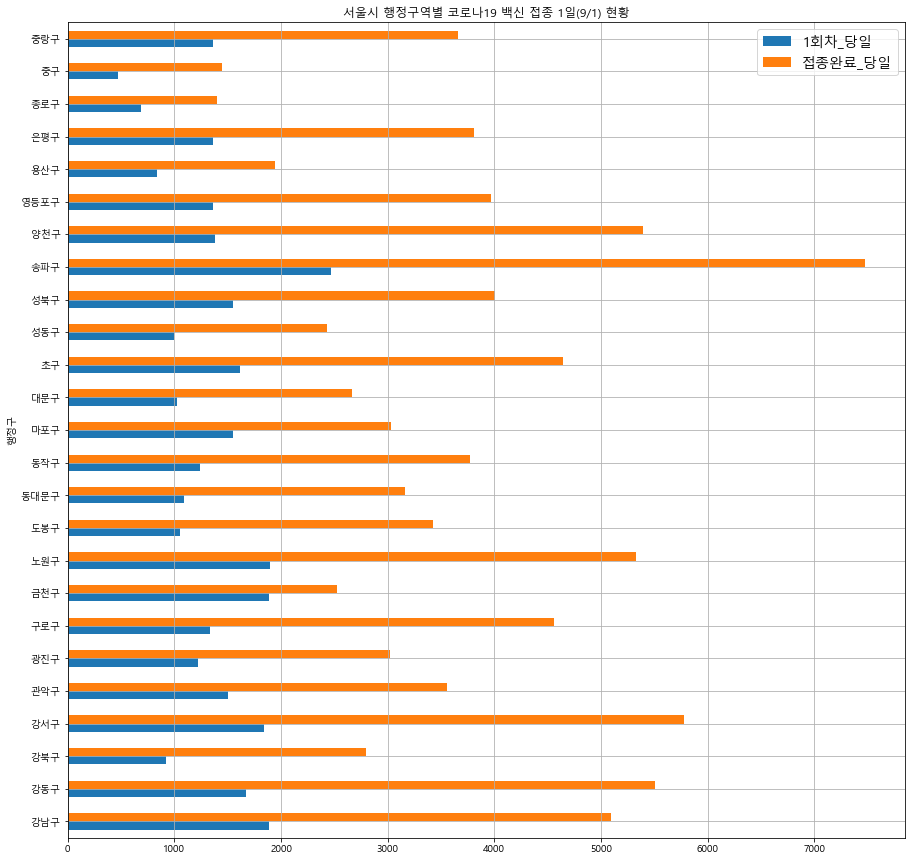

In [63]:
import matplotlib.pyplot as plt

# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

today_total.plot(kind = 'barh', grid = True, figsize = (15,15)) # 그래프 타입, 그리드, 그리고 사이즈 지정.
plt.title('서울시 행정구역별 코로나19 백신 접종 1일(9/1) 현황') # 그래프에 타이틀 표기.
plt.legend(loc='best', ncol=1, fontsize=14) # 그래프에 범례 위치, 형식, 그리고 폰트 사이즈 지정.
plt.show()

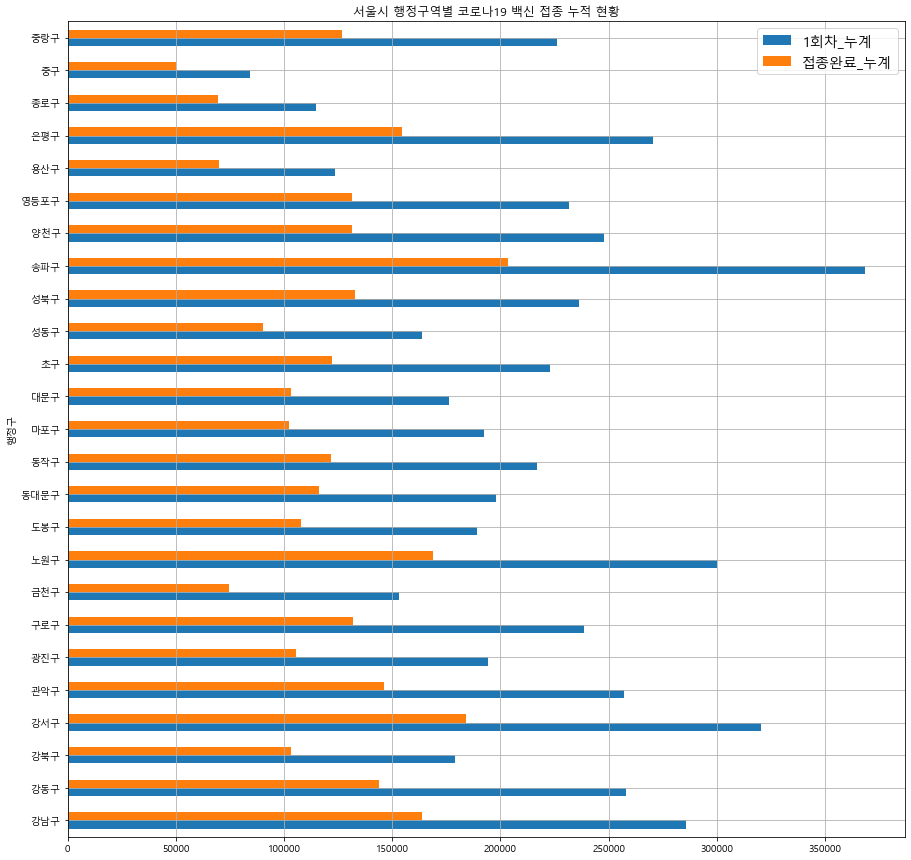

In [64]:
import matplotlib.pyplot as plt

# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sum_total.plot(kind = 'barh', grid = True, figsize = (15,15)) # 그래프 타입, 그리드, 그리고 사이즈 지정.
plt.title('서울시 행정구역별 코로나19 백신 접종 누적 현황') # 그래프에 타이틀 표기.
plt.legend(loc='best', ncol=1, fontsize=14) # 그래프에 범례 위치, 형식, 그리고 폰트 사이즈 지정.
plt.show()

In [24]:
# 행정구별 확진자 수.csv 파일 읽어 오기.
import pandas as pd
r_table = pd.read_csv('C:/myPyCode/행정구별 확진자 수.csv')
r_table.head()

,지역,1월,2월,3월,4월,5월,6월,7월,8월,합계
0,강남구,227,118,240,428,529,792,1249,1288,38968
1,강동구,179,161,252,253,314,284,523,457,19384
2,강북구,174,124,125,133,266,164,348,333,13336
3,강서구,215,96,133,217,189,213,576,651,18320
4,관악구,162,182,129,313,226,268,1132,1001,27304


In [35]:
# 필요한 데이터만 추출하기 위해 drop 메서드로 필요 없는 데이터(열, column) 삭제
p_sum = r_table.drop(['지역', '1월','2월','3월','4월','5월','6월','7월','8월'],axis = 1)
p_sum.tail()

,합계
20,15320
21,21024
22,6856
23,7440
24,13866


In [36]:
p_sum.columns

Index(['합계'], dtype='object')

In [37]:
p_sum.columns = ['2021년 1월 ~ 8월 확진자 합계']
p_sum.tail(3)

,2021년 1월 ~ 8월 확진자 합계
22,6856
23,7440
24,13866


In [26]:
c.head(2)

,행정구,1회차_당일,1회차_누계,접종완료_당일,접종완료_누계
0,강남구,1891.0,285976.0,5094.0,163555.0
1,강동구,1676.0,258219.0,5505.0,143925.0


In [27]:
# 필요한 데이터만 추출하기 위해 drop 메서드로 필요 없는 데이터(열, column) 삭제
i_total = c.drop(['1회차_당일','1회차_누계'],axis = 1)
i_total.tail(3)

,행정구,접종완료_당일,접종완료_누계
22,종로구,1403.0,69333.0
23,중구,1450.0,50264.0
24,중랑구,3655.0,126960.0


In [38]:
table = pd.concat([i_total, p_sum], axis=1)
table.head()

,행정구,접종완료_당일,접종완료_누계,2021년 1월 ~ 8월 확진자 합계
0,강남구,5094.0,163555.0,38968
1,강동구,5505.0,143925.0,19384
2,강북구,2796.0,103093.0,13336
3,강서구,5778.0,184156.0,18320
4,관악구,3560.0,146272.0,27304


In [80]:
table['확진자 대비 금일 코로나19 백신 접종 비율'] = (table['접종완료_당일']/table['2021년 1월 ~ 8월 확진자 합계'])*100
table['확진자 대비 누적 코로나19 백신 접종 비율'] = (table['접종완료_누계']/table['2021년 1월 ~ 8월 확진자 합계'])*100
table.tail()

,행정구,접종완료_당일,접종완료_누계,2021년 1월 ~ 8월 확진자 합계,확진자 대비 금일 코로나19 백신 접종 비율,확진자 대비 누적 코로나19 백신 접종 비율
20,용산구,1942.0,69752.0,15320,12.676240,455.300261
21,은평구,3811.0,154314.0,21024,18.126903,733.989726
22,종로구,1403.0,69333.0,6856,20.463827,1011.274796
23,중구,1450.0,50264.0,7440,19.489247,675.591398
24,중랑구,3655.0,126960.0,13866,26.359440,915.620943


In [81]:
c_table = table.drop(['접종완료_당일','접종완료_누계','2021년 1월 ~ 8월 확진자 합계'],axis = 1)
c_table.tail()

,행정구,확진자 대비 금일 코로나19 백신 접종 비율,확진자 대비 누적 코로나19 백신 접종 비율
20,용산구,12.676240,455.300261
21,은평구,18.126903,733.989726
22,종로구,20.463827,1011.274796
23,중구,19.489247,675.591398
24,중랑구,26.359440,915.620943


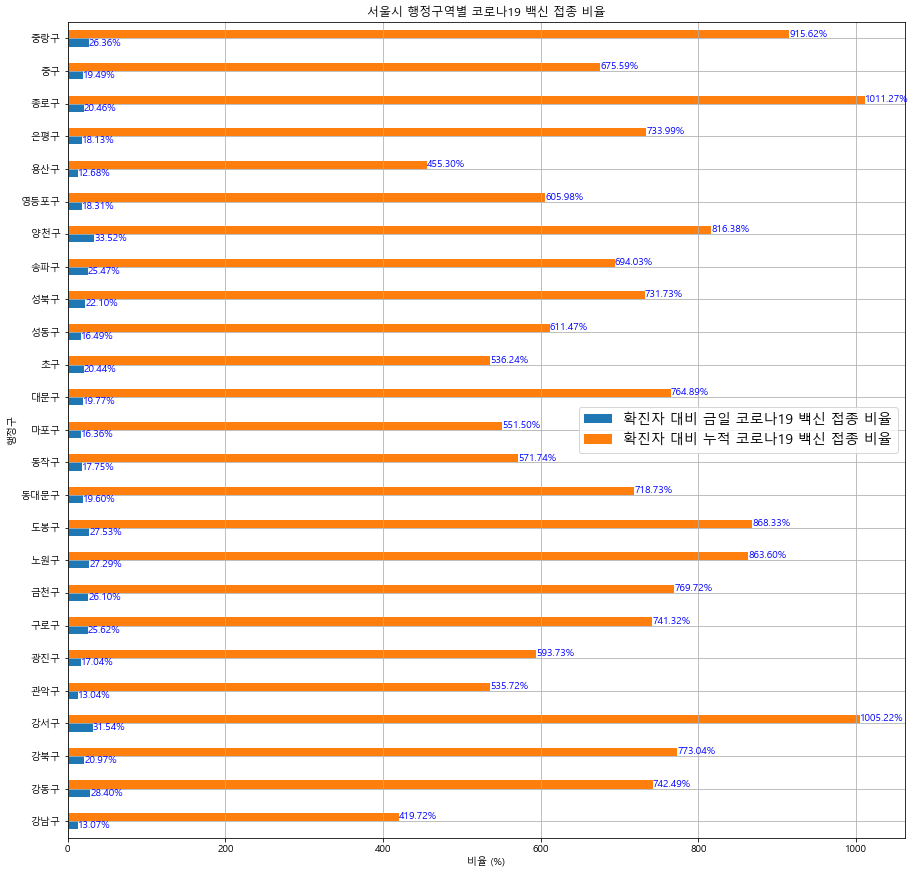

In [137]:
import matplotlib.pyplot as plt

# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

c_table.plot(kind = 'barh', grid = True, figsize = (15,15)) # 그래프 타입, 그리드, 그리고 사이즈 지정.
plt.title('서울시 행정구역별 코로나19 백신 접종 비율') # 그래프에 타이틀 표기.
plt.ylabel('행정구')
plt.xlabel('비율 (%)')

import numpy as np
y_pos = np.arange(len(c_table.index))

a=[]  # 가로 막대 그래프 y축 명 지정을 위해 표의 값을 리스트로 저장.
for i in c_table.index:
    a.append(c_table['행정구'].values[i])
    
plt.yticks(y_pos, a)

data1=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in c_table.index:
    data1.append(c_table['확진자 대비 금일 코로나19 백신 접종 비율'].values[i])

data2=[]
for i in c_table.index:
    data2.append(c_table['확진자 대비 누적 코로나19 백신 접종 비율'].values[i])

# 그래프에 값 표시를 하기위한 함수 세트... 항목이 24개 이고 각각 표기하기 위해 for 문 사용.
for i, v in enumerate(c_table.index):  .
    str_val = "%0.2f" % data1[i]+"%"   # 소수점 두자리까지 표기 하기 위해 형식 지정. 비율이기 때문에 % 표기. 
    plt.text(data1[i],                 # 그래프에 값 표시하는 함수. plt.text()
            v, str_val, fontsize=10, color='blue',       # 값 폰트 크기 및 색상 지정.
            horizontalalignment='left', verticalalignment='top')   # 값 폰트 위치 지정.
    
for i, v in enumerate(c_table.index):
    str_val = "%0.2f" % data2[i]+"%"
    plt.text(data2[i],
            v, str_val, fontsize=10, color='blue',
            horizontalalignment='left', verticalalignment='bottom')

plt.legend(loc='best', ncol=1, fontsize=14) # 그래프에 범례 위치, 형식, 그리고 폰트 사이즈 지정.
plt.show()